In [4]:
import warnings
warnings.filterwarnings('ignore')
# Import necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
import seaborn as sns
import os
import functools as ft
from collections import defaultdict

!pip install pyxlsb

Defaulting to user installation because normal site-packages is not writeable


In [5]:
edgers = pd.read_csv("finalTeamSixDataset.csv")
edgers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   year                                                    2899 non-null   int64  
 1   FIPS                                                    2899 non-null   int64  
 2   county                                                  2899 non-null   object 
 3   state                                                   2899 non-null   object 
 4   urban                                                   2899 non-null   object 
 5   analysis_value                                          2899 non-null   int64  
 6   Less than 50k                                           2899 non-null   float64
 7   50k to 99,999                                           2899 non-null   float64
 8   100k to 149,999                       

In [6]:
100*(edgers.isna().sum())/len(edgers)

year                                                      0.000000
FIPS                                                      0.000000
county                                                    0.000000
state                                                     0.000000
urban                                                     0.000000
analysis_value                                            0.000000
Less than 50k                                             0.000000
50k to 99,999                                             0.000000
100k to 149,999                                           0.000000
Over 150k                                                 0.000000
Total not grad HS                                         0.000000
Total grad HS                                             0.000000
Total Associates                                          0.000000
Total Bachelors                                           0.000000
Total Professional or Graduate Degrees                    0.00

In [7]:
edgers.fillna(edgers.mean(), inplace = True)
edgers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   year                                                    2899 non-null   int64  
 1   FIPS                                                    2899 non-null   int64  
 2   county                                                  2899 non-null   object 
 3   state                                                   2899 non-null   object 
 4   urban                                                   2899 non-null   object 
 5   analysis_value                                          2899 non-null   int64  
 6   Less than 50k                                           2899 non-null   float64
 7   50k to 99,999                                           2899 non-null   float64
 8   100k to 149,999                       

In [8]:
(edgers.iloc[:,22] + edgers.iloc[:,23] + edgers.iloc[:,24]).value_counts()

1.0    1477
1.0     948
1.0     474
dtype: int64

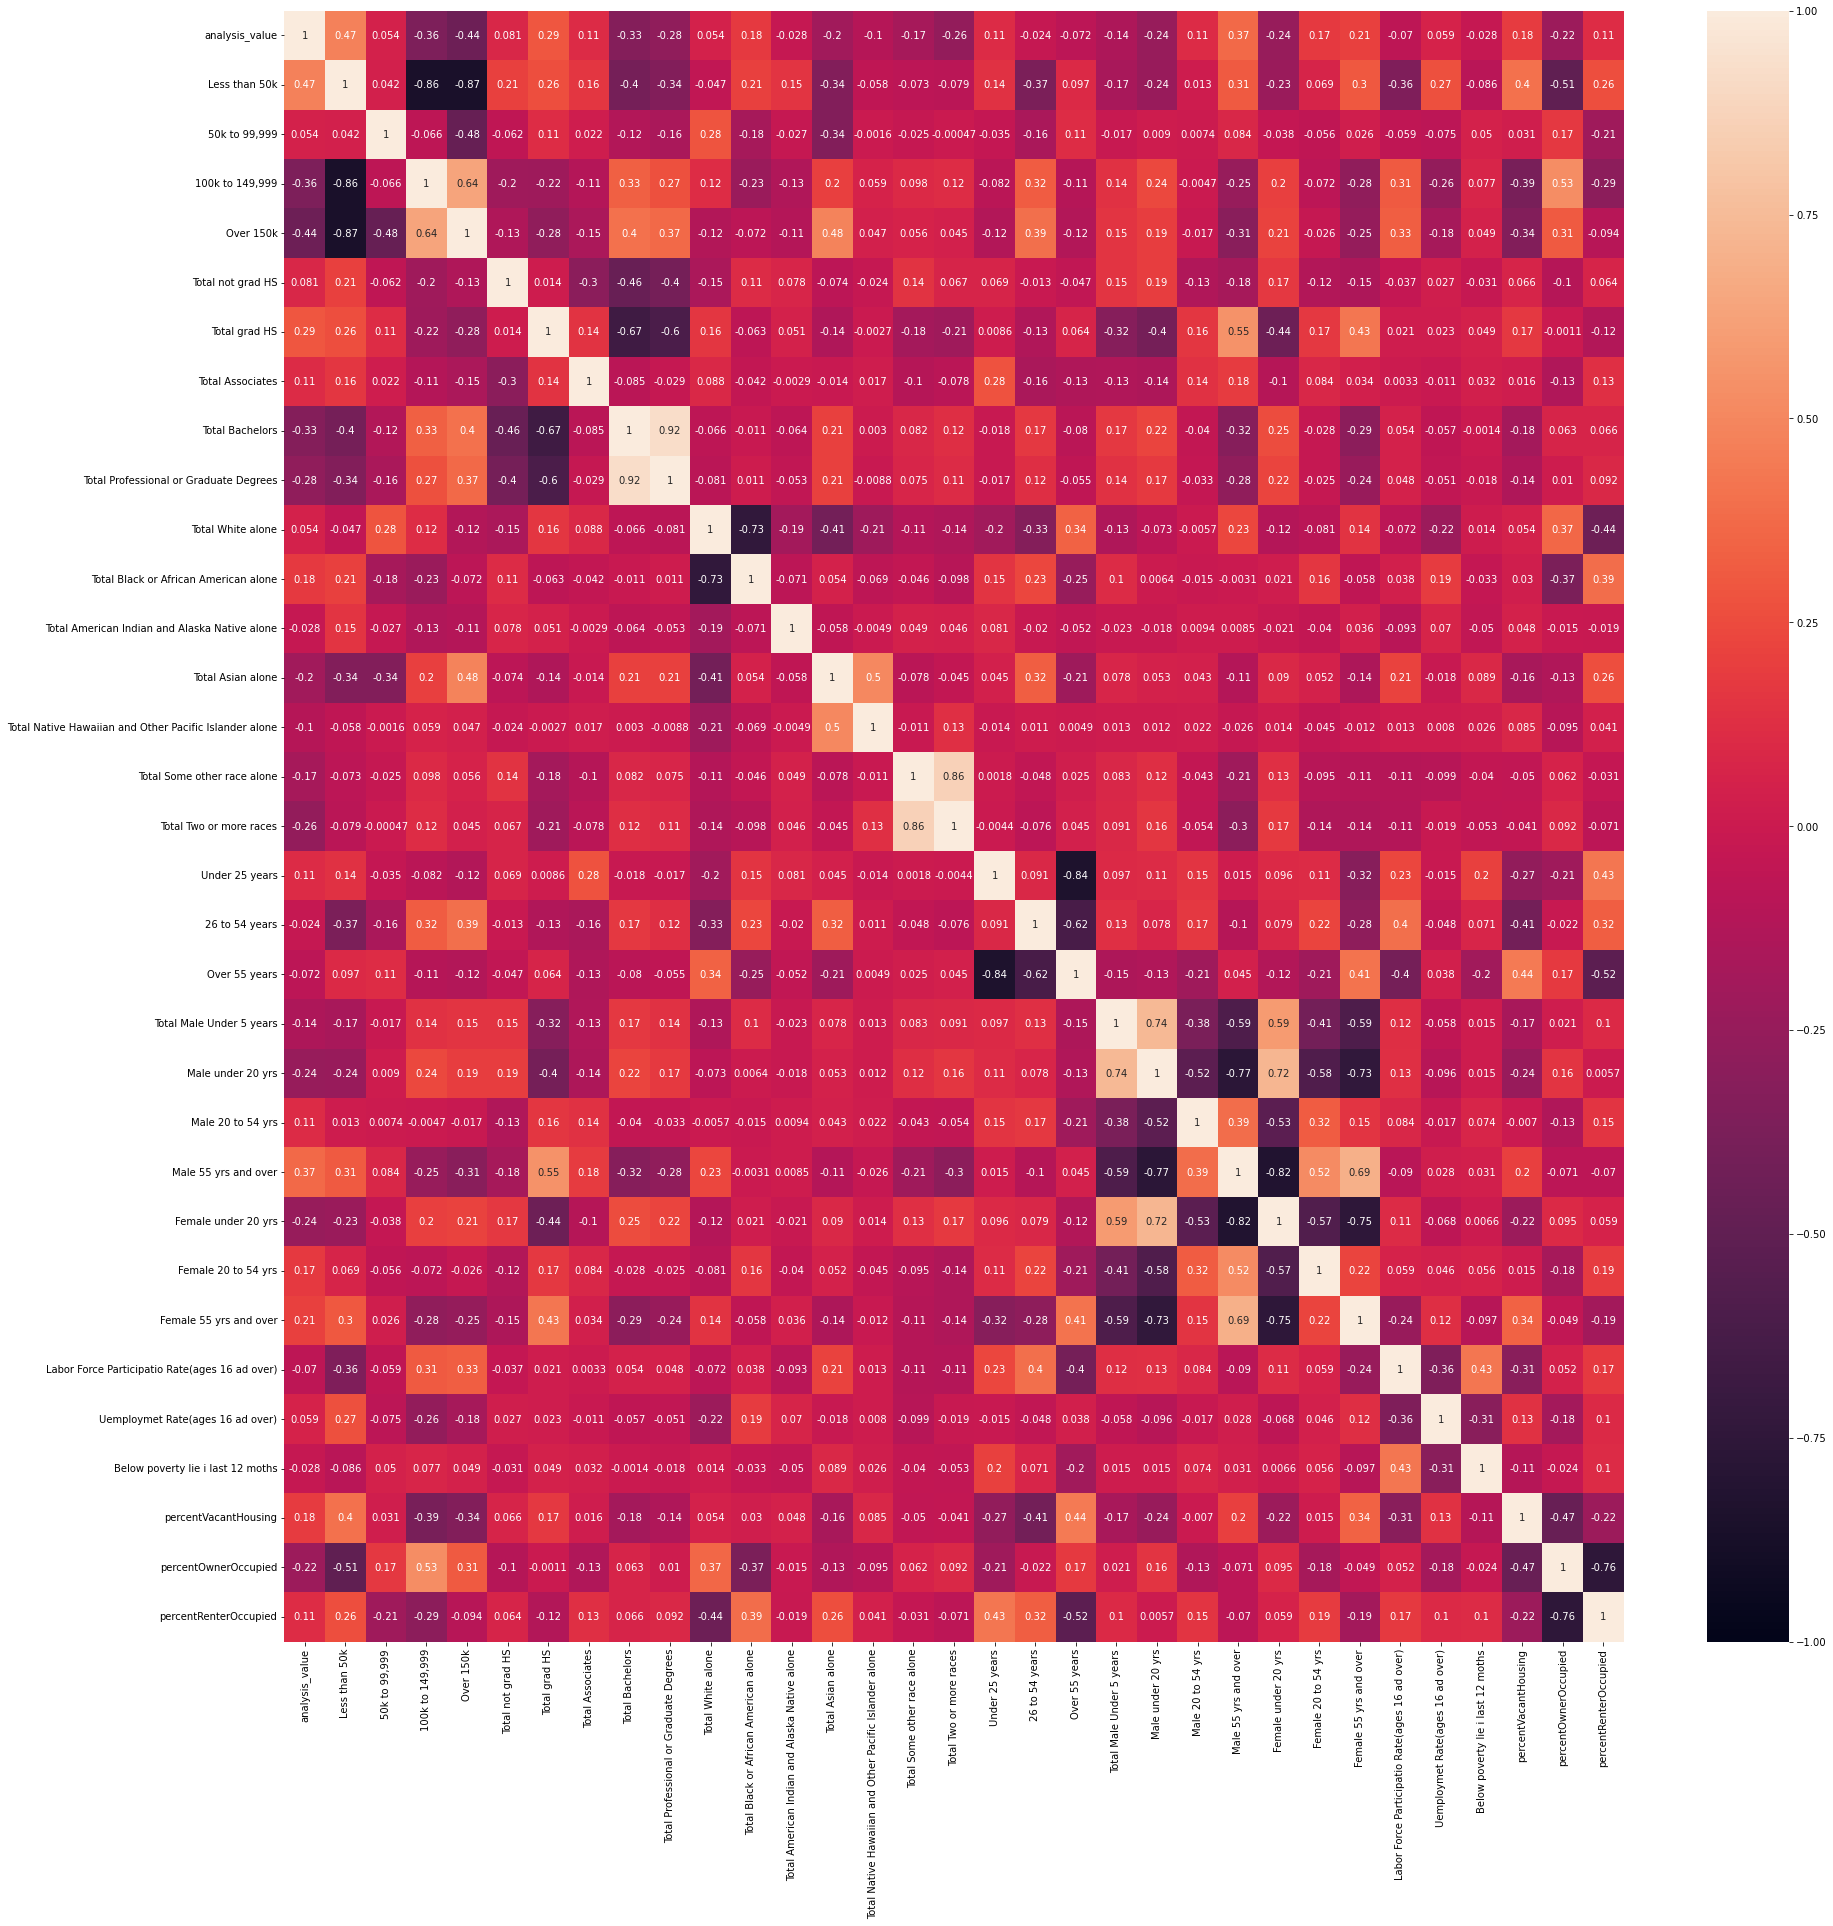

In [9]:
plt.figure(figsize=(30,30))
sns.heatmap(edgers.drop(['FIPS',"year"],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

## Obs
- All incomes are correlated with eachother, which somewhat makes sense
- Total White and Total Black are negatively correlated
- Under 25 years and over 55 years old (insurance) are correlated
- Male over 55 years and older and female under 20 years are are strongly, negatively correlated
- Female over 55 years and older and male under 20 years are are strongly, negatively correlated
- Percent Owner Occupied and percent Renter Occupied are negatively correlated
- Male under 20 and Male over 55 are correlated